In [1]:
#The file Bank.xls contains data on 5000 customers. 
#The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage,
#securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). 
#Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
#Domain:Banking

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
bankdata = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
bankdata.shape

(5000, 14)

In [5]:
print('The data provided has 14 columns and 5000 rows(observations)')

The data provided has 14 columns and 5000 rows(observations)


In [6]:
bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
bankdata.isnull().values.any()

False

In [8]:
print('There seems no null values in the data')

There seems no null values in the data


In [9]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
print("Data type for each attribute: \nID: Integer (stored using 64 bits) but as per the context of the case we should treat it as a cateorical data \nAge: Integer (stored using 64 bits)  \nExperience: Integer (stored using 64 bits)  \nIncome: Integer (stored using 64 bits)  \nZIP Code: Integer (stored using 64 bits) but as per the context of the case we should treat it as a cateorical data  \nFamily: Integer (stored using 64 bits)  \nCC Avg: Float (stored using 64 bits) \nEducation: Interger (stored using 64 bits) bt as the context of the case, it is a categorical data \nMortgage: Integer(stored using 64 bits)   \nPersonal Loan: Binary Variable  (stored using 64 bits)  \nSecurities Account: Binary Variable  (stored using 64 bits)  \nCD Account: Binary Variable  (stored using 64 bits)  \nOnline: Binary Variable  (stored using 64 bits)   \nCredit Card: Binary Variable  (stored using 64 bits)")

Data type for each attribute: 
ID: Integer (stored using 64 bits) but as per the context of the case we should treat it as a cateorical data 
Age: Integer (stored using 64 bits)  
Experience: Integer (stored using 64 bits)  
Income: Integer (stored using 64 bits)  
ZIP Code: Integer (stored using 64 bits) but as per the context of the case we should treat it as a cateorical data  
Family: Integer (stored using 64 bits)  
CC Avg: Float (stored using 64 bits) 
Education: Interger (stored using 64 bits) bt as the context of the case, it is a categorical data 
Mortgage: Integer(stored using 64 bits)   
Personal Loan: Binary Variable  (stored using 64 bits)  
Securities Account: Binary Variable  (stored using 64 bits)  
CD Account: Binary Variable  (stored using 64 bits)  
Online: Binary Variable  (stored using 64 bits)   
Credit Card: Binary Variable  (stored using 64 bits)


# We will change the datatype to the correct one

In [11]:
bankdata['ZIP Code']=bankdata['ZIP Code'].astype('category')

In [12]:
bankdata['Education']=bankdata['Education'].astype('category')

In [40]:
bankdata['Personal Loan']=bankdata['Personal Loan'].astype('category')

In [14]:
bankdata['Securities Account']=bankdata['Securities Account'].astype('category')

In [15]:
bankdata['CD Account']=bankdata['CD Account'].astype('category')

In [16]:
bankdata['Online']=bankdata['Online'].astype('category')

In [17]:
bankdata['CreditCard']=bankdata['CreditCard'].astype('category')

In [18]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null category
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(7), float64(1), int64(6)
memory usage: 336.8 KB


# Our data contains only 6 quantitative (numeric) data: Age, Experience, Income, Family, CC Avg, Mortgage

In [19]:
bankdata['Age'].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

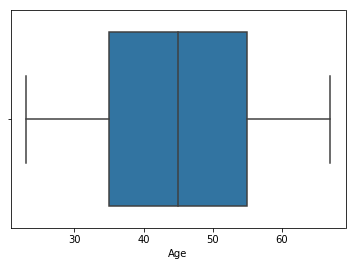

In [20]:
sns.boxplot(bankdata['Age'])

In [21]:
print("5 point summary of age: \n Minimum = 24 (means that in the data provided the youngest member is of 24 years of age) \n Maximum = 67 (means that in the data provided the oldest member is of 67 years of age \n Median (50th percentile) = 45 (It means that when our data is sorted in lowest to highest, the middle most person's age is 45 years \n Lower Quartile (25th percentile) = 36 (means that the 25% of youngest people in our group are 36 years of age and younger \n Upper Quartile (75th percentile) = 55 (means that the 25% of oldest people in our group are 55 years of age and older")

5 point summary of age: 
 Minimum = 24 (means that in the data provided the youngest member is of 24 years of age) 
 Maximum = 67 (means that in the data provided the oldest member is of 67 years of age 
 Median (50th percentile) = 45 (It means that when our data is sorted in lowest to highest, the middle most person's age is 45 years 
 Lower Quartile (25th percentile) = 36 (means that the 25% of youngest people in our group are 36 years of age and younger 
 Upper Quartile (75th percentile) = 55 (means that the 25% of oldest people in our group are 55 years of age and older


In [22]:
bankdata['Experience'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

# Since we are seeng there are negative entries in the Experience attribute, and negtive experience simply can mean no experience, so we are going to replace all negative entries as 0

In [7]:
bankdata.loc[bankdata['Experience']<0] = 0

In [24]:
bankdata['Experience'].describe()

count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [25]:
print("5 point summary of experience: \n Minimum = 0 (means that in the data provided the minimum experience is of 0 years) \n Maximum = 43 (means that in the data provided the most experience member has 43 years of experience \n Median (50th percentile) = 20 (It means that when our data is sorted in lowest to highest, the middle most person's experience is 20 years \n Lower Quartile (25th percentile) = 10 (means that the 25% of people in our group have experience of 10 years and lesser \n Upper Quartile (75th percentile) = 30 (means that the 25% of people in our group have 30 years of experience and more")

5 point summary of experience: 
 Minimum = 0 (means that in the data provided the minimum experience is of 0 years) 
 Maximum = 43 (means that in the data provided the most experience member has 43 years of experience 
 Median (50th percentile) = 20 (It means that when our data is sorted in lowest to highest, the middle most person's experience is 20 years 
 Lower Quartile (25th percentile) = 10 (means that the 25% of people in our group have experience of 10 years and lesser 
 Upper Quartile (75th percentile) = 30 (means that the 25% of people in our group have 30 years of experience and more


In [26]:
bankdata['Income'].describe()

count    5000.000000
mean       73.046800
std        46.479457
min         0.000000
25%        38.000000
50%        63.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [27]:
print("5 point summary of income: \n Minimum = 0 (means that in the data provided the members have minimum income of 0K) \n Maximum = 224K (means that in the data provided the most income member earns 224K \n Median (50th percentile) = 63K (It means that when our data is sorted in lowest to highest, the middle most person's income is 63K \n Lower Quartile (25th percentile) = 38K (means that the 25% of people in our group have income of 38K and lesser \n Upper Quartile (75th percentile) = 98K (means that the 25% of people in our group have income of 98K and more")

5 point summary of income: 
 Minimum = 0 (means that in the data provided the members have minimum income of 0K) 
 Maximum = 224K (means that in the data provided the most income member earns 224K 
 Median (50th percentile) = 63K (It means that when our data is sorted in lowest to highest, the middle most person's income is 63K 
 Lower Quartile (25th percentile) = 38K (means that the 25% of people in our group have income of 38K and lesser 
 Upper Quartile (75th percentile) = 98K (means that the 25% of people in our group have income of 98K and more


In [28]:
bankdata['Family'].describe()

count    5000.000000
mean        2.396400
std         1.147663
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Family, dtype: float64

# There are rows with 0 entries in the data, which is not relevant as family size cannot be 0, hence we will replace the 0 family size with 1

In [29]:
bankdata['Family']= bankdata['Family'].replace(0,1)

In [30]:
bankdata['Family'].describe()

count    5000.000000
mean        2.396400
std         1.147663
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Family, dtype: float64

Doing the descriptive for Family again after replacing 0 (Zero) rows with 1

In [31]:
print("5 point summary of family: \n Minimum = 1 (means that in the data provided the members have minimum famiy size of 1) \n Maximum = 4 (means that in the data provided the maximum size of the family is 4 \n Median (50th percentile) = 2 (It means that when our data is sorted in lowest to highest, the middle most person's family size is 2 \n Lower Quartile (25th percentile) = 1 (means that the 25% of people in our group have family size of 1 \n Upper Quartile (75th percentile) = 3 (means that the 25% of people in our group have family size of 3 and more")

5 point summary of family: 
 Minimum = 1 (means that in the data provided the members have minimum famiy size of 1) 
 Maximum = 4 (means that in the data provided the maximum size of the family is 4 
 Median (50th percentile) = 2 (It means that when our data is sorted in lowest to highest, the middle most person's family size is 2 
 Lower Quartile (25th percentile) = 1 (means that the 25% of people in our group have family size of 1 
 Upper Quartile (75th percentile) = 3 (means that the 25% of people in our group have family size of 3 and more


In [32]:
bankdata['CCAvg'].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [33]:
print("5 point summary of CC Avg: \n Minimum = 0 (means that in the data provided the minimum spending is 0$) \n Maximum = 10K (means that in the data provided the maximum spending is $10K \n Median (50th percentile) = 1.5K (It means that when our data is sorted in lowest to highest, the middle most person's spending is $1.5K \n Lower Quartile (25th percentile) = 0.67K (means that the 25% of people in our group have spending of $0.67K and lesser \n Upper Quartile (75th percentile) = 2.5K (means that the 25% of people in our group have CC spending of $2.5K and more")

5 point summary of CC Avg: 
 Minimum = 0 (means that in the data provided the minimum spending is 0$) 
 Maximum = 10K (means that in the data provided the maximum spending is $10K 
 Median (50th percentile) = 1.5K (It means that when our data is sorted in lowest to highest, the middle most person's spending is $1.5K 
 Lower Quartile (25th percentile) = 0.67K (means that the 25% of people in our group have spending of $0.67K and lesser 
 Upper Quartile (75th percentile) = 2.5K (means that the 25% of people in our group have CC spending of $2.5K and more


In [34]:
bankdata['Mortgage'].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

In [35]:
print("5 point summary of Mortgage: \n Minimum = 0 (means that in the data provided the minimum mortgage is 0$) \n Maximum = 635K (means that in the data provided the maximum mortgage is $635K \n Median (50th percentile) = 0K (It means that when our data is sorted in lowest to highest, the middle most person's mortgage is $0K \n Lower Quartile (25th percentile) = 0K (means that the 25% of people in our group have mortgage of $0 and lesser \n Upper Quartile (75th percentile) = 100K (means that the 25% of people in our group have mortgage of $100K and more")

5 point summary of Mortgage: 
 Minimum = 0 (means that in the data provided the minimum mortgage is 0$) 
 Maximum = 635K (means that in the data provided the maximum mortgage is $635K 
 Median (50th percentile) = 0K (It means that when our data is sorted in lowest to highest, the middle most person's mortgage is $0K 
 Lower Quartile (25th percentile) = 0K (means that the 25% of people in our group have mortgage of $0 and lesser 
 Upper Quartile (75th percentile) = 100K (means that the 25% of people in our group have mortgage of $100K and more


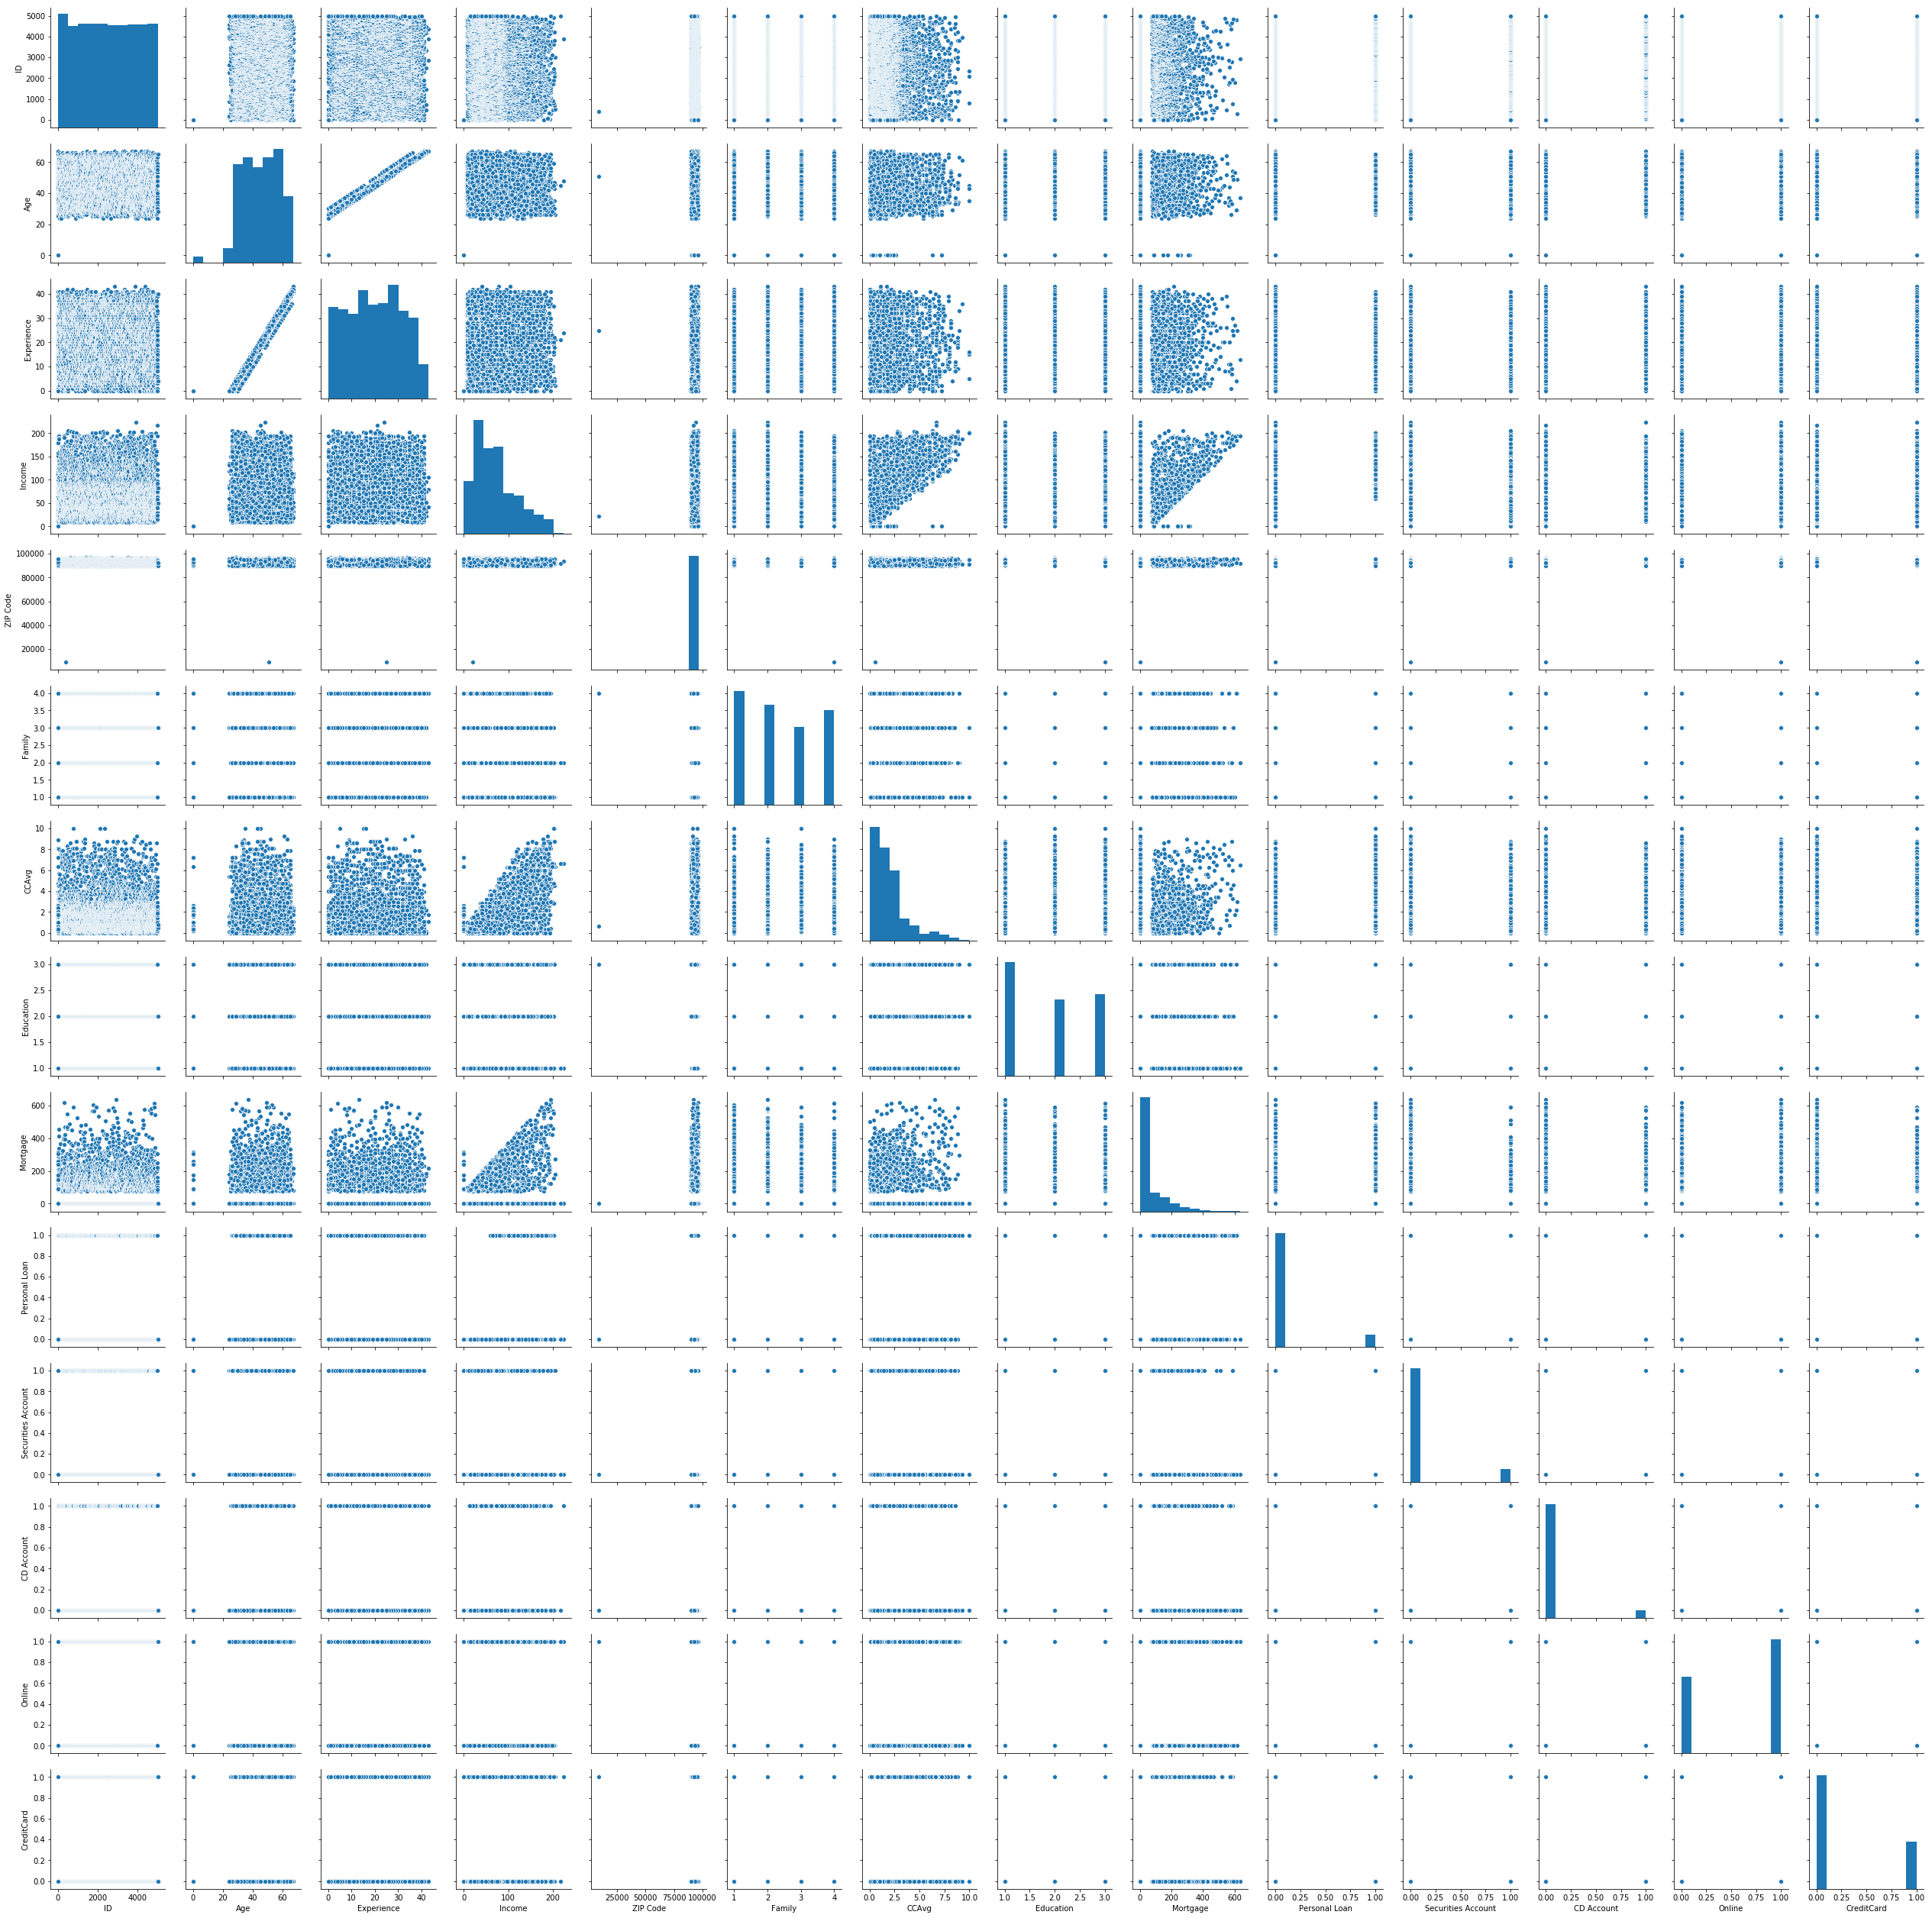

In [36]:
sns.pairplot(bankdata,palette = 'husl')

# There are few interesting observations emerging from pair plot as
# 1. Apperantly age and experience are appearing collinear and it is evident as an individual ages, he/she gains more experience.
# 2. CC Average (average spending on Credit Card) when plotted against Income- appears all busy below a line at almost 45 degrees -> It means that the spending / limitation is a funcion of income (which is common in banking sector).
# 3. Mortgage when plotted against Income- appears all busy below a line at almost 45 degrees -> It means that the mortgage available limitation is a funcion of income (which is common in banking sector).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F95DEF240>]],
      dtype=object)

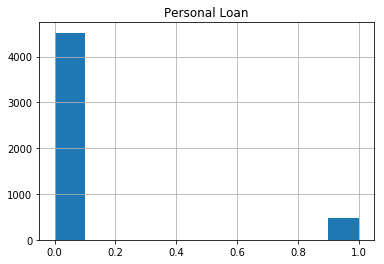

In [8]:
bankdata.hist('Personal Loan')

In [52]:
count_target=bankdata['Personal Loan'].value_counts()

In [53]:
count_target

0    4520
1     480
Name: Personal Loan, dtype: int64

# We see that our target variable is skewed with majority as not given loan and miority as given loans category

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


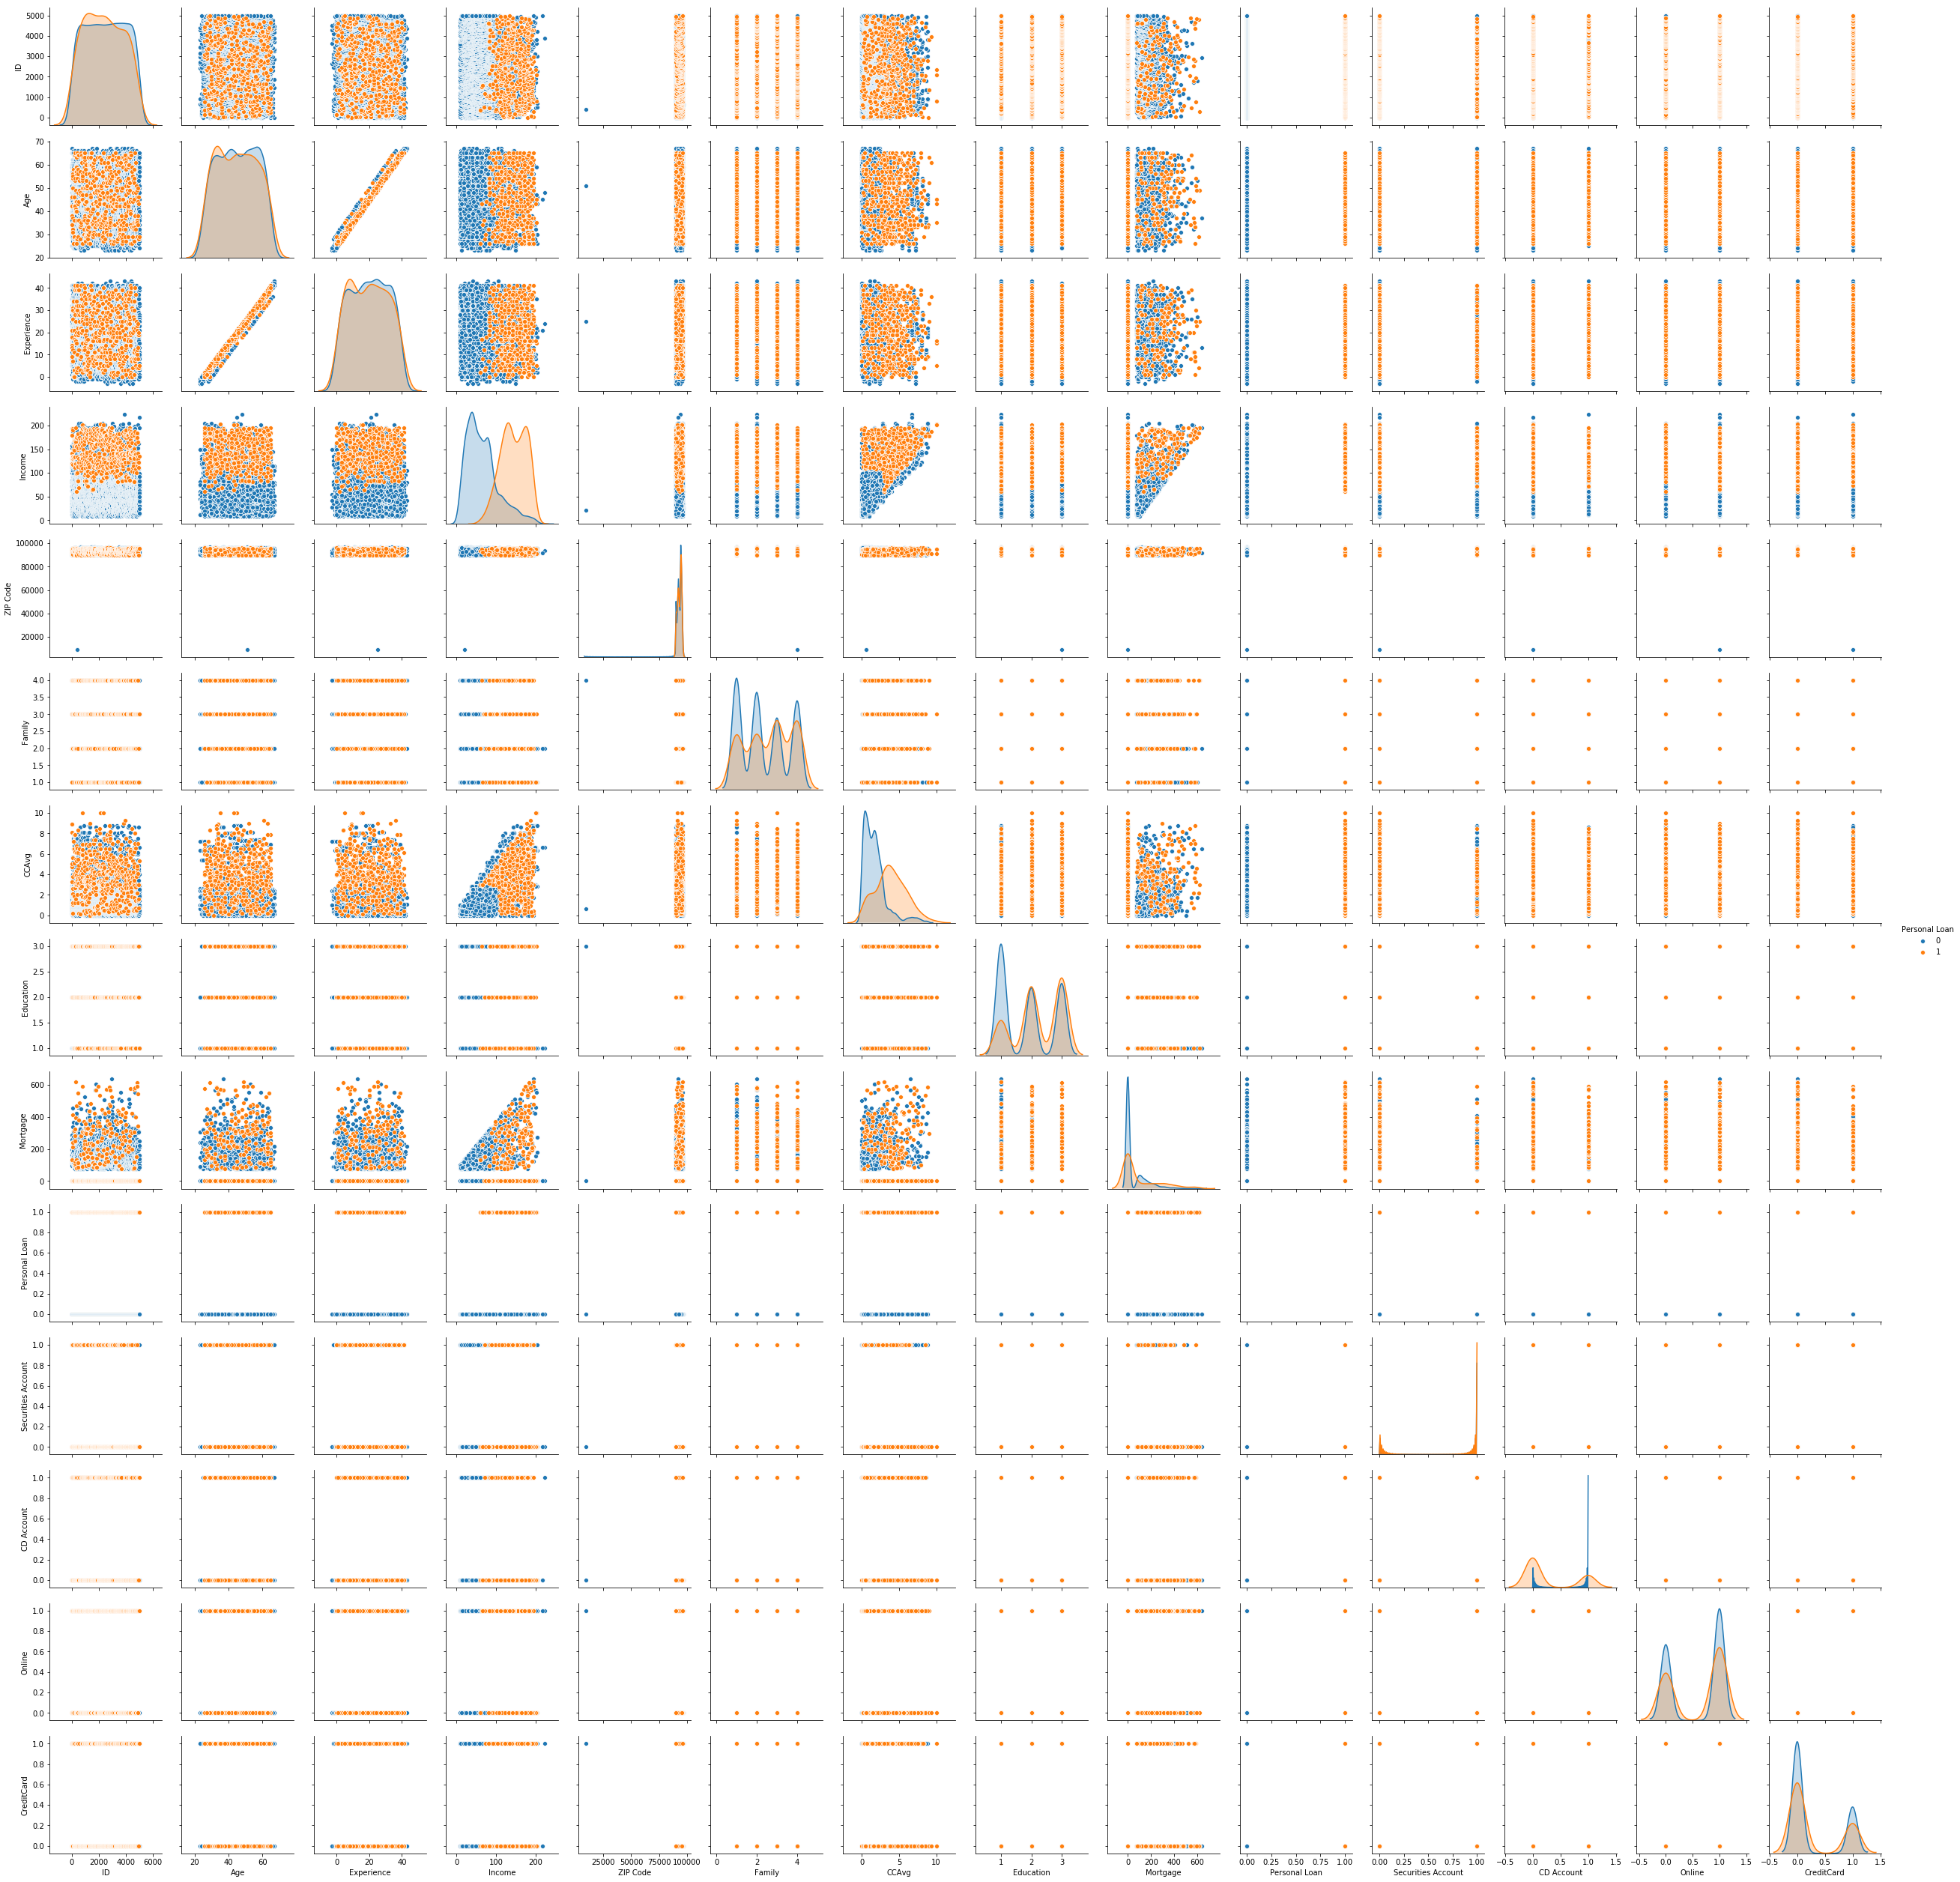

In [15]:
sns.pairplot(bankdata,hue='Personal Loan')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8378676D8>,
      dtype=object)

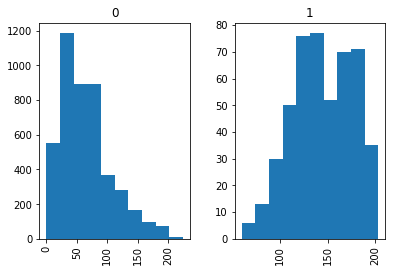

In [58]:
bankdata.hist(by='Personal Loan', column= 'Income')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E83758BA58>,
      dtype=object)

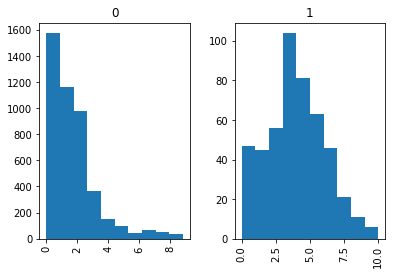

In [59]:
bankdata.hist(by='Personal Loan', column= 'CCAvg')

In [68]:
pd.crosstab(bankdata['CCAvg'],bankdata['Personal Loan'])

Personal Loan,0,1
CCAvg,,
0.00,157,1
0.10,181,2
0.20,195,8
0.30,232,6
0.40,173,4
0.50,155,8
0.60,112,4
0.67,18,0
0.70,163,6


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8379C28D0>,
      dtype=object)

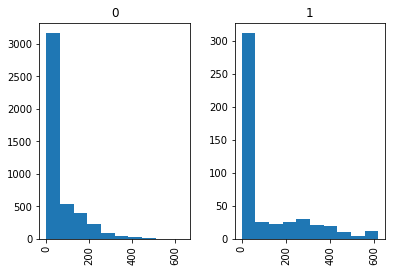

In [69]:
bankdata.hist(by='Personal Loan', column= 'Mortgage')

In [70]:
pd.crosstab(bankdata['CreditCard'],bankdata['Personal Loan'])

Personal Loan,0,1
CreditCard,,
0,3208,337
1,1312,143


In [71]:
pd.crosstab(bankdata['Online'],bankdata['Personal Loan'])

Personal Loan,0,1
Online,,
0,1857,189
1,2663,291


# Seeing the distribution of various variables with hue as Personal Loan, following observations are intresting:
# Age, Experience and Family size are  not much a factor to the Personal Loan given in th data or not
# People with higher education(>=3) have not availed personal loan
# People with higher mortgage have not availed personal loan
# Income parity in Personal Loan availabiity is seen- Majorly low income group has not given Personal Loan and higher Income group are mostly availed with Personal Loan
# Most of the People with Lesser Credit Card spending availed no Personal Loan
# People having or not having credit card has no impact on availing Personal Loan as in both categories the proportion of people with Personal Loan is ~10%
# People having or not having Online Services has no impact on availing Personal Loan as in both categories the proportion of people with Personal Loan is ~10%


# Creation of X and Y for the data given

In [11]:
# We have to drop ID column as it is just an identifier column
# We will then seperate 'Personal Laon' Column from X data and then use 'Personal Loan'Column as Y data(Target)

In [12]:
X= bankdata.drop(labels ='Personal Loan', axis =1)
y = bankdata['Personal Loan']

In [13]:
# As in our data, the Mortgage, Income, Experience and CCAvg varies from decimal to hundreds in scale, it is better that we scale/ normalise our x data

In [14]:
from scipy.stats import zscore
XScale = X.apply(zscore)
XScale.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.214451e-15,1.754596e-16,5.595524e-17,-8.481549e-17,-6.177489e-16,-1.362466e-16,2.788880e-17,4.907186e-17,-3.574918e-17,-3.617329e-16,4.426903e-16,8.837375e-18,2.460254e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.697868e+00,-3.703821e+00,-1.758808e+00,-1.571750e+00,-9.519111e+00,-2.026510e+00,-1.095073e+00,-2.170278e+00,-5.524404e-01,-3.392283e-01,-2.535403e-01,-1.201579e+00,-6.406538e-01
25%,-8.639407e-01,-8.284003e-01,-8.846315e-01,-7.541032e-01,-4.211051e-02,-1.170214e+00,-7.120986e-01,-1.003086e+00,-5.524404e-01,-3.392283e-01,-2.535403e-01,-1.201579e+00,-6.406538e-01
50%,-2.576102e-03,-6.851716e-03,-1.045515e-02,-2.161773e-01,1.264154e-01,-3.139181e-01,-2.376680e-01,1.641073e-01,-5.524404e-01,-3.392283e-01,-2.535403e-01,8.322381e-01,-6.406538e-01
75%,8.656478e-01,8.146969e-01,8.637212e-01,5.369188e-01,2.504348e-01,5.423779e-01,3.339351e-01,1.331300e+00,4.332612e-01,-3.392283e-01,-2.535403e-01,8.322381e-01,1.560906e+00
max,1.731814e+00,1.800555e+00,2.000150e+00,3.248065e+00,4.614019e-01,1.398674e+00,4.620958e+00,1.331300e+00,5.706765e+00,2.947867e+00,3.944146e+00,8.322381e-01,1.560906e+00


In [15]:
y.describe()

count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal Loan, dtype: float64

In [16]:
# Split X and y in to train and test set in the ratio 70:30

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XScale, y, test_size= 0.30, random_state = 1)

# Classification using Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

# Fitting the model to train data
model = LogisticRegression(solver ='liblinear')
model.fit(X_train,y_train)

# prediction on test data
y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)


print(coef_df)

print('intercept of the model=', model.intercept_)

         0         1        2         3        4         5         6   \
0 -0.046897 -0.261486  0.25769  2.340493 -0.00389  0.810958  0.287564   

         7         8         9         10        11        12  
0  1.397158  0.079549 -0.341886  0.862866 -0.283084 -0.478983  
intercept of the model= [-4.63010216]


In [19]:
model_performance = model.score(X_test,y_test)
print(model_performance)

0.9473333333333334


# Model performance for Logistic Regression Model is 0.947

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict, labels =[1,0])
print(cm)

[[  87   62]
 [  17 1334]]


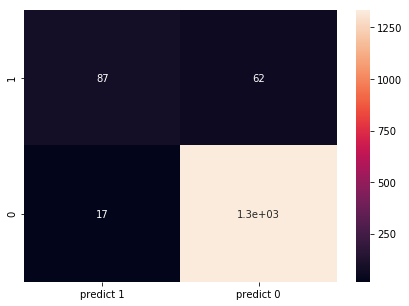

In [21]:
df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                     columns = [i for i in ['predict 1','predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot = True)

The Confusion Matrix:
True Positive: Correctly predicted Personal Loan availed = 87

True Negative: Correctly predicted Personal Loan not availed = 1332

False Positive: Incorrectly predicted Personal Loan availed but actually not availed = 16

False Negative: Incorrectly predicted Personal Loan not availed but actually availed = 62



# Model Performance measure: ROC curve

In [22]:
from sklearn.metrics import roc_curve, auc
probas = model.fit(X_train, y_train).predict_proba(X_test)

In [23]:
# calculate ROC and Area Under the curve for our Logixtic Regression Model
fpr, tpr, thresholds = roc_curve(y_test, probas[:,1])
roc_auc = auc(fpr,tpr)
print('Area under the curve: %f' % roc_auc)

Area under the curve: 0.953815


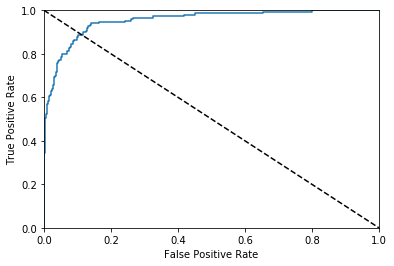

In [24]:
#Plot ROC curve

import pylab as pl
pl.clf()
pl.plot(fpr,tpr,label = 'ROC curve for Logistic Regression( area= %0.2f)'%roc_auc)
pl.plot([0,1],[1,0],'k--')
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.show()

# Classification Report for default Logistic Regression model

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.58      0.69       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



# Logistic Regression with Hyper Parameter Tuning with GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)
logreg = LogisticRegression(solver ='liblinear')
grid = GridSearchCV(estimator=logreg,
                    param_grid=param_grid,
                    cv=5,
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    4.1s


Best Score:  0.9528571428571428
Best Params:  {'C': 1, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    6.5s finished


# Classification using KNN

Using the same X_train, y_train, X_test and y_test, that has been created in 70:30 ratioabove

In [28]:
# Building KNN model
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=5, weights ='distance')
NNH.fit(X_train, y_train)
y_pred_KNN =NNH.predict(X_test)
NNH.score(X_test,y_test)

0.948

# Model performance for KNN Classifier Model is 0.948

In [29]:
from sklearn.metrics import confusion_matrix

cm_KNN = confusion_matrix(y_test,y_pred_KNN, labels =[1,0])
print(cm_KNN)

[[  79   70]
 [   8 1343]]


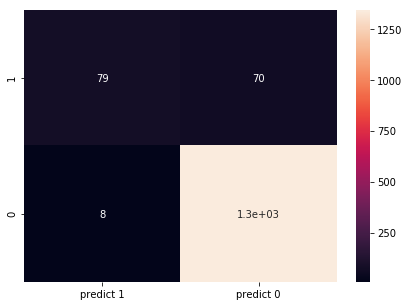

In [30]:
df_cmKNN = pd.DataFrame(cm_KNN, index = [i for i in ['1','0']],
                     columns = [i for i in ['predict 1','predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cmKNN, annot = True)

The Confusion Matrix: True Positive: Correctly predicted Personal Loan availed = 71

True Negative: Correctly predicted Personal Loan not availed = 1345

False Positive: Incorrectly predicted Personal Loan availed but actually not availed = 6

False Negative: Incorrectly predicted Personal Loan not availed but actually availed = 78

# Model Performance measure: ROC curve

Area under the curve: 0.904143


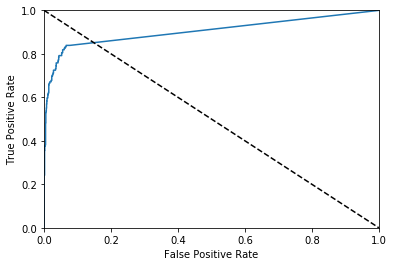

In [31]:
from sklearn.metrics import roc_curve, auc
probas = NNH.fit(X_train, y_train).predict_proba(X_test)

# calculate ROC and Area Under the curve for our KNN Model
fpr_KNN, tpr_KNN, thresholds = roc_curve(y_test, probas[:,1])
roc_auc_KNN = auc(fpr_KNN,tpr_KNN)
print('Area under the curve: %f' % roc_auc_KNN)


#Plot ROC curve

import pylab as pl
pl.clf()
pl.plot(fpr_KNN,tpr_KNN,label = 'ROC curve for KNN Classifier( area= %0.2f)'%roc_auc_KNN)
pl.plot([0,1],[1,0],'k--')
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.show()

# Classification Report for KNN model

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.91      0.53      0.67       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.93      0.76      0.82      1500
weighted avg       0.95      0.95      0.94      1500



# KNN with Hyper Parameter Tuning with GridSearchCV

In [33]:

from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

param_grid = {'n_neighbors': [5, 6, 7, 8, 9, 10, 11], 
             'p': [1, 2, 5]}
                                    
                                    
from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=param_grid, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)
gs_KNN.fit(X_train, y_train);
gs_KNN.best_params_


Fitting 15 folds for each of 21 candidates, totalling 315 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:  7.5min finished


{'n_neighbors': 5, 'p': 5}

In [34]:
gs_KNN.best_score_

0.9554285714285714

# Classification using Naive Bayes algorithm

In [35]:
# Training of the model
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB  
NB_model = GaussianNB()
NB_model.fit(X_train, y_train.ravel())

#performnce using train data
NB_train_predict = NB_model.predict(X_train)

print('model Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train,NB_train_predict)))
print()

model Accuracy: 0.8860



# Model performance on test data set

In [48]:
NB_test_predict = NB_model.predict(X_test)

print('model Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test,NB_test_predict)))
print()

model Accuracy: 0.8753



# Model performance for NB Classifier Model is 0.8753


In [50]:
from sklearn.metrics import confusion_matrix

cm_NB = confusion_matrix(y_test,NB_test_predict, labels =[1,0])
print(cm_NB)

[[  84   65]
 [ 122 1229]]


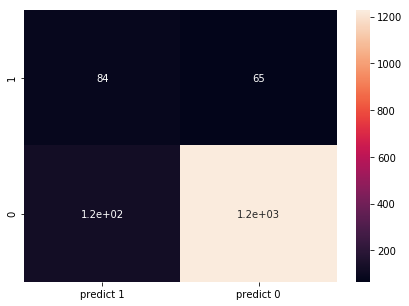

In [51]:
df_cmNB = pd.DataFrame(cm_NB, index = [i for i in ['1','0']],
                     columns = [i for i in ['predict 1','predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cmNB, annot = True)

The Confusion Matrix: True Positive: Correctly predicted Personal Loan availed = 84

True Negative: Correctly predicted Personal Loan not availed = 1229

False Positive: Incorrectly predicted Personal Loan availed but actually not availed = 122

False Negative: Incorrectly predicted Personal Loan not availed but actually availed = 65

# Model Performance measure: ROC curve

Area under the curve: 0.915057


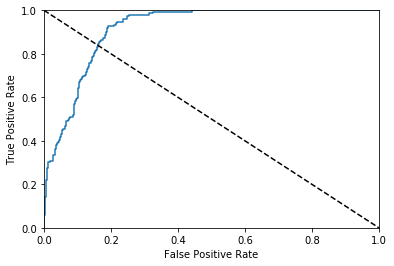

In [53]:
from sklearn.metrics import roc_curve, auc
probas = NB_model.fit(X_train, y_train).predict_proba(X_test)

# calculate ROC and Area Under the curve for our NB Model
fpr_NB, tpr_NB, thresholds = roc_curve(y_test, probas[:,1])
roc_auc_NB = auc(fpr_NB,tpr_NB)
print('Area under the curve: %f' % roc_auc_NB)


#Plot ROC curve

import pylab as pl
pl.clf()
pl.plot(fpr_NB,tpr_NB,label = 'ROC curve for NB Classifier( area= %0.2f)'%roc_auc_NB)
pl.plot([0,1],[1,0],'k--')
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.show()





# Classification Report for NB model

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,NB_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.47       149

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500



# Comparison of models

As this classification problem is about Banking Indusry with a target to chose the probable Personal Loan availers. 
We have to bear 2 things in mind: 1.The data is highly skewed towards 0 means "No Personal loan " are very high as comared to 1 "Personal Loan availers" 2.In banking industry, the cost of oportunity (that is cost of loosing an at Personal Loan customer) is much lesser as compared to Cost of defult (means givg loan to a defaulter)

Hence, in view of the above points, simple accuracy measure may not be the right measure for a good clssifier. We will look at the FPR and AUC to identify the better model. The ideal mode should have low FPR and high AUC (but as we know AUC can be biased if the data is biased, so AUC is secondary)

Logistic Regression : FPR= FP/(FP+TN)= 16/(16+1332)*100 =1.18%) ; AUC = 0.9534

KNN: FPR= FP/(FP+TN)= 6/(6+1345)*100 =0.44%) ; AUC = 0.8911

Naive Bayes: FPR= FP/(FP+TN)= 122/(122+1229)*100 =0.903%) ; AUC = 0.9150

Hence seeing the above results, KNN is the favored model (that too AUC can be increased with choosing the best parameter for K)
Naive Bayes has no room for optimization and hence we have to rely on default performances.
